## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as tsa
import pandas_datareader.data as web

In [15]:
web.DataReader?

Signature:
web.DataReader(
    name,
    data_source=None,
    start=None,
    end=None,
    retry_count=3,
    pause=0.1,
    session=None,
    api_key=None,
)
Docstring:
Imports data from a number of online sources.

Currently supports Google Finance, St. Louis FED (FRED),
and Kenneth French's data library, among others.

Parameters
----------
name : str or list of strs
    the name of the dataset. Some data sources (IEX, fred) will
    accept a list of names.
data_source: {str, None}
    the data source ("iex", "fred", "ff")
start : string, int, date, datetime, Timestamp
    left boundary for range (defaults to 1/1/2010)
end : string, int, date, datetime, Timestamp
    right boundary for range (defaults to today)
retry_count : {int, 3}
    Number of times to retry query request.
pause : {numeric, 0.001}
    Time, in seconds, to pause between consecutive queries of chunks. If
    single value given for symbol, represents the pause between retries.
session : Session, default None
    

In [5]:
industrial_production = web.DataReader("IPGMFN", "fred", "1988", "2017-12").squeeze()


In [6]:
industrial_production.head(5)

DATE
1988-01-01    55.6315
1988-02-01    56.8324
1988-03-01    57.5487
1988-04-01    57.7727
1988-05-01    57.8687
Name: IPGMFN, dtype: float64

In [7]:
components = tsa.seasonal_decompose(industrial_production, model="additive")

In [11]:
components.seasonal.head(5)

DATE
1988-01-01   -2.090507
1988-02-01   -0.579679
1988-03-01    0.747645
1988-04-01   -0.233705
1988-05-01    0.192588
Name: seasonal, dtype: float64

In [12]:
ts = industrial_production.to_frame("Original").assign(Trend = components.trend).assign(Seasonality = components.seasonal).assign(Residual=components.resid)

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

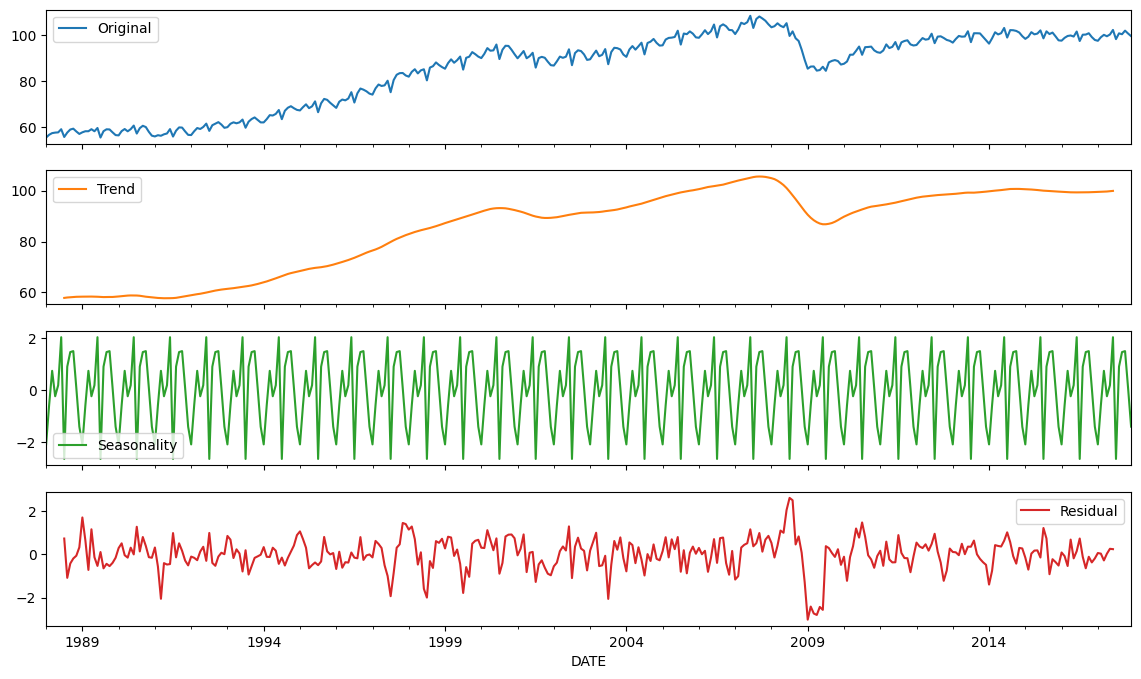

In [14]:
ts.plot(subplots=True, figsize=(14,8))